INTRODUCTION: 

Cardiovascular diseases are responsible for 17.9 million premature deaths per year (WHO, 2021). From coronary heart disease to myocardial infarctions, multiple symptoms account for the disease classification of cardiovascular diseases. A data set published by the University of California Irvine subsets 14 out of 76 attributes or symptoms of heart disease. This project aims to compare the presence or absence of these 14 attributes and its relationship to the diagnosis of heart disease based on the published data set. The overall goal of this project is to answer the question, which of the following 14 attributes is strongly correlated to the diagnosis of heart disease?



PRELIMENARY DATA ANAYLYSIS: 

The  following data involves an initial exploratory data analysis that encompasses cleaning and transforming the data into a tidy format, generating summary tables from the training data for observational analysis, and producing relevant visualizations that aid in comprehending the distribution of each variable.

In [31]:
#libraries to install
library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)

In [32]:
#reading the data
heart_data<-read_csv("/home/jovyan/heart_disease_analysis/heart.csv")

heart_data<-heart_data|>
mutate(target = as_factor(target))
heart_data

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [33]:
#RUN THESE ONLY IF YOU WANT TO LOOK AT DATA OF PEOPLE HAVING HEART DISEASE VS NO HEART DISEASE
#exploratory_table1<-heart_data|>
#filter(target== 1)
#exploratory_table1

#exploratory_table2<-heart_data|>
#filter(target== 0)
#exploratory_table2



In [34]:
set.seed(20)
# Compute correlations
correlations <- cor(heart_data)

# Get correlations with target
cor_with_target <- correlations["target",]
sorted_cor <- sort(abs(cor_with_target), decreasing = TRUE)
print(sorted_cor)


ERROR: Error in cor(heart_data): 'x' must be numeric


In [ ]:
#creating the split

heart_split <- initial_split(heart_data, prop = 0.75, strata = target)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)
heart_training<-heart_training|>
mutate(target = as_factor(target))

In [ ]:
#number of people with heart disease vs no heart disease in the training dataset.

heart_target_groups<- heart_training|>
group_by(target)|>
summarize(n=n())
heart_target_groups

In [ ]:
set.seed(20)
#predictors average 
heart_predictors_avg<- heart_training|>
summarise( mean_age = mean(age, na.rm = TRUE),
    mean_trestbps = mean(trestbps, na.rm = TRUE),
    mean_chol = mean(chol, na.rm = TRUE) )

heart_predictors_avg


#using an average for categorical chest pain variable (1-4 types) does not make sense, therefore I used count
chest_pain_count <- heart_training |>
  group_by(cp) |>
  summarize(count = n())

chest_pain_count
#using an average for categorical sex variable does not make sense, therefore I used count
sex_count <- heart_training |>
  group_by(sex) |>
  summarize(count = n())

sex_count

#cholesterol detailed summary
chol_summary<- heart_training|>
summarise (    mean_chol = mean(chol, na.rm = TRUE),
            min_chol = min(chol, na.rm = TRUE),
            max_chol = max(chol, na.rm = TRUE))
chol_summary

#Resting blood pressure detailed summary
trestbps_summary <- heart_training |>
  summarise(mean_trestbps = mean(trestbps, na.rm = TRUE),
    min_trestbps = min(trestbps, na.rm = TRUE),
    max_trestbps = max(trestbps, na.rm = TRUE) )

trestbps_summary


In [ ]:
#This is the histogram for the number of people with different types of chest pain in the training dataset
chestpain_hist<-heart_training|>
ggplot(aes(x=cp))+
       geom_histogram(fill = "blue", bins = 30)+
       labs(x="Chest Pain Type", y="Count", title="Histogram of Chest Pain Type in Training Data")
       
chestpain_hist

#This is a box plot for cholesterol levels
chol_plot <- heart_training|>
ggplot(aes(x = factor(target), y = chol)) + 
  geom_boxplot(fill= "blue") +
  labs(x = "Heart Disease Presence", 
       y = "Serum Cholesterol",
       title = "Boxplot of Serum Cholesterol by Heart Disease Presence")

chol_plot

#Histogram for Age
age_hist <- heart_training |>
  ggplot(aes(x=age, fill=..count..)) +
  geom_histogram( bins = 30) +
  labs(x = "Age", y = "Count", title = "Histogram of Age in Training Data")
  
age_hist

#Histogram for Resting Blood Pressure
bp_hist <- heart_training |>
  ggplot(aes(x=trestbps)) +
  geom_histogram(fill = "blue", bins = 30) +
  labs(x = "Resting Blood Pressure", y = "Count", title = "Resting Blood Pressure in Training Data")
  
bp_hist

#Bar Chart for Sex
sex_bar <- heart_training |>
  ggplot(aes(x=factor(sex))) +
  geom_bar(fill = "blue") +
  labs(x = "Sex", y = "Count", title = "Sex in Training Data")
  
sex_bar


METHODS: 

Utilizing Jupyter Notebook and R, we will import the Heart Disease dataset from the UCI repository using the read.csv() function. Our analysis centers on 14 clinical attributes, with the "target" field serving as our response variable.

Initial steps involve data cleaning to rectify missing, inconsistent entries and removing incorrect variables with imputation techniques as necessary. Post-cleaning, we undertake Exploratory Data Analysis (EDA) involving summary statistics and visualizations, providing insights into variable distributions and relationships with heart disease presence.

A classification algorithm will be employed for predictive modeling, trained on a data subset, and evaluated via cross-validation.

The predictive accuracy of our model will be visualized via a confusion matrix and Receiver Operating Characteristic (ROC) curve. Additionally, a feature importance plot will emphasize the most predictive variables. All steps are executed within the Jupyter notebook environment to ensure replicability.


EXPECTED OUTCOMES AND SIGNIFICANCE: 


Machine learning is becoming increasingly popular in the medical field, and many researchers and clinicians are interested in building an accurate prediction model for particular diseases based on clinical features. Although reliable prediction models are helpful in creating tailored treatment plans for patients, the exploratory analysis and validation process of building a classifier may be helpful in uncovering the biological mechanism of the disease itself. For example, certain clinical features may be more strongly correlated with clinical outcome. This may raise questions such as how certain variables play into the pathology of the disease, leading to further experimental questions. 



DATA ANALYSIS

In [ ]:
set.seed(20)
#Creating the recipe
heart_recipe <- recipe(target ~ age	+sex+cp+trestbps+chol+fbs+restecg+thalach+exang+oldpeak+slope+ca+thal, data = heart_training) |>
step_scale(all_predictors()) |>
step_center(all_predictors())
heart_recipe

In [38]:
set.seed(20) #Do not remove

#Creating a K tune for training data
knn_tune<-nearest_neighbor(weight_func = "rectangular", neighbors=tune())|>
set_engine("kknn")|>
set_mode("classification")

#Specifiying the amount of K
k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 2))

heart_vfold<-vfold_cv(heart_training, v=10, strata = target)

#Training the model
knn_results <- workflow()|>
add_recipe(heart_recipe)|>
add_model(knn_spec)|>
tune_grid(resamples=heart_vfold, grid=k_vals)|>
collect_metrics()

#Checking Accuracies
accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies






neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9791498,10,0.005913933,Preprocessor1_Model01
3,accuracy,binary,0.9230094,10,0.008925266,Preprocessor1_Model02
5,accuracy,binary,0.8358974,10,0.008599997,Preprocessor1_Model03
7,accuracy,binary,0.8318826,10,0.011456428,Preprocessor1_Model04
9,accuracy,binary,0.8604926,10,0.015789109,Preprocessor1_Model05
11,accuracy,binary,0.8552632,10,0.015261617,Preprocessor1_Model06
13,accuracy,binary,0.8540148,10,0.017220515,Preprocessor1_Model07
15,accuracy,binary,0.8552969,10,0.019879685,Preprocessor1_Model08
17,accuracy,binary,0.8514170,10,0.019921678,Preprocessor1_Model09


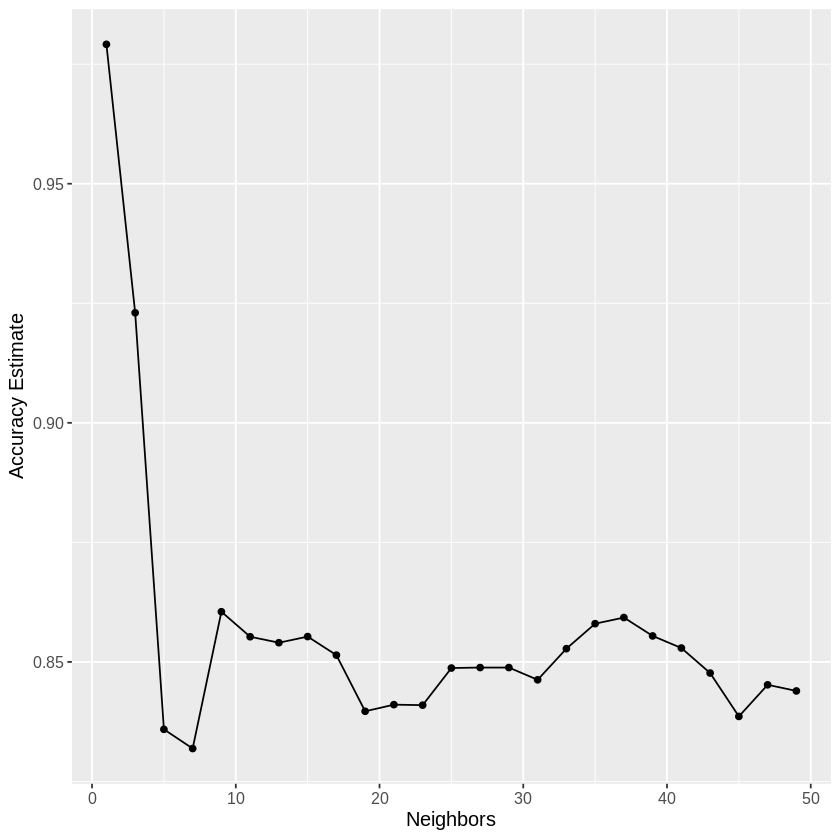

In [48]:
set.seed(20)
#Plotting Accuracies
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k

In [40]:
#let's choose k=3 and k=9 and fit them onto the testing set
set.seed(20)
#Specifying the k for our model
knn_spec3<-nearest_neighbor(weight_func = "rectangular", neighbors=3)|>
set_engine("kknn")|>
set_mode("classification")

knn_spec9<-nearest_neighbor(weight_func = "rectangular", neighbors=9)|>
set_engine("kknn")|>
set_mode("classification")



In [49]:
set.seed(20)
#Fitting the models onto the training set
knn_fit <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec3) |>
  fit(data = heart_training)
knn_fit


#This workflow is for k=9 (comment it if you do not need it)
knn_fit9<- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec9) |>
  fit(data = heart_training)
knn_fit9

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.06640625
Best kernel: rectangular
Best k: 3

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(9,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1380208
Best kernel: rectangular
Best k: 9

In [50]:
set.seed(20)
#Predicting process
heart_test_predictions <- predict(knn_fit, heart_testing) |>
  bind_cols(heart_testing)

glimpse(heart_test_predictions)


Rows: 257
Columns: 15
$ .pred_class <fct> 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1…
$ age         <dbl> 52, 53, 70, 34, 67, 45, 56, 50, 57, 51, 64, 61, 42, 41, 55…
$ sex         <dbl> 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1…
$ cp          <dbl> 0, 0, 0, 1, 0, 0, 2, 1, 0, 3, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1…
$ trestbps    <dbl> 125, 140, 145, 118, 106, 104, 130, 120, 130, 125, 128, 130…
$ chol        <dbl> 212, 203, 174, 210, 223, 208, 256, 244, 131, 213, 263, 330…
$ fbs         <dbl> 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0…
$ restecg     <dbl> 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1…
$ thalach     <dbl> 168, 155, 125, 192, 142, 148, 142, 162, 115, 125, 105, 169…
$ exang       <dbl> 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0…
$ oldpeak     <dbl> 1.0, 3.1, 2.6, 0.7, 0.3, 3.0, 0.6, 1.1, 1.2, 1.4, 0.2, 0.0…
$ slope       <dbl> 2, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2…
$ ca          <dbl

In [51]:
# Accuracy of the prediction of K=3 model on the testing set
heart_test_predictions |>
  metrics(truth = target, estimate = .pred_class) |>
  filter(.metric == "accuracy")



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9533074
